In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from skimage.io import imread , imshow
from skimage import color
from skimage import measure
from skimage import exposure
import math
from skimage.morphology import opening, binary_opening
from skimage.morphology import disk
class DominantColors:

    CLUSTERS = None
    IMAGE = None
    TIMG = None
    COLORS = None
    LABELS = None
    ORIG = None
    WCSS = None
    pLABEL = None
    
    def __init__(self, image):
        #read image
        img = cv2.imread(image)
        
        #convert to rgb from bgr
        #img = color.rgb2hsv(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        self.ORIG = img.copy()
        
        # Contrast stretching
        p2, p98 = np.percentile(img, (2, 98))
        img = exposure.rescale_intensity(img, in_range=(p2, p98))
        self.TIMG = img.copy()
        
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 1))
        
        #save image after operations
        self.IMAGE = img
        
    def dominantColors(self):
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS, init = 'k-means++', random_state = 0)
        kmeans.fit(self.IMAGE)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #find label of purple color
        #self.pLABEL = kmeans.predict([[128,0,128]])
        #self.pLABEL = kmeans.predict([[150,255,127]])
        self.pLABEL = kmeans.predict([[0]])
        
        #returning after converting to integer from float
        return self.COLORS
    
    def setIMG(self,img):
        # Contrast stretching
        p2, p98 = np.percentile(img, (2, 98))
        img = exposure.rescale_intensity(img, in_range=(p2, p98))
        self.TIMG = img.copy()
        
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 1))
        
        #save image after operations
        self.IMAGE = img
    
    def showO(self):
        imshow(self.ORIG)
    
    def showTIMG(self):
        imshow(self.TIMG)
        
    def elbow(self):
        #Elbow method
        wcss = []
        for i in range(1, 10):
            kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
            kmeans.fit(self.IMAGE)
            wcss.append(kmeans.inertia_)
        self.WCSS = wcss
        plt.plot(range(1, 10), wcss)
        plt.title('The Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.show()
        
    def findK(self):
        m = (self.WCSS[0]-self.WCSS[8])/(1-9)
        c = self.WCSS[0]-m*1
        A=m
        B=-1
        maxD = 0
        K = 0
        for x1,y1 in enumerate(self.WCSS,1):
            d = abs(A*x1+B*y1+c)/math.sqrt(A**2+B**2)
            if d > maxD:
                maxD = d
                self.CLUSTERS=x1+1
        print('found :'+str(self.CLUSTERS)+' group')
        return self.CLUSTERS

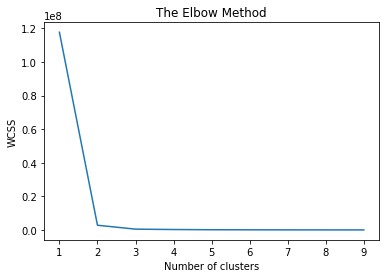

found :3 group


array([[202],
       [197],
       [195],
       ...,
       [227],
       [216],
       [221]], dtype=uint8)

In [2]:
img = 'segmentation_WBC-master/compare/1.png'
dc = DominantColors(img) 
dc.elbow()
dc.findK()
dc.IMAGE

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


array([[-6.92068625e-12],
       [ 1.91822068e+02],
       [ 2.40724605e+02]])

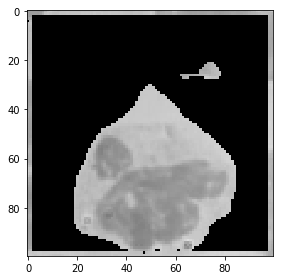

In [3]:
dc.dominantColors()
dc.showO() 
dc.COLORS

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


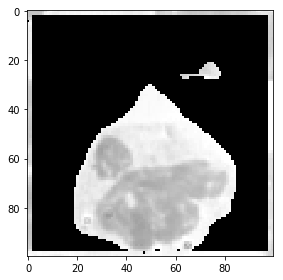

In [4]:
dc.COLORS
dc.showTIMG()

In [5]:
dc.LABELS
new = np.reshape(dc.LABELS, (-1, dc.ORIG.shape[1]))

In [6]:
new

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 0, ..., 0, 2, 1],
       ...,
       [2, 2, 0, ..., 0, 2, 1],
       [2, 2, 2, ..., 2, 2, 1],
       [2, 2, 2, ..., 2, 1, 2]])

In [7]:
dc.pLABEL[0]
new.shape[0]

100

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


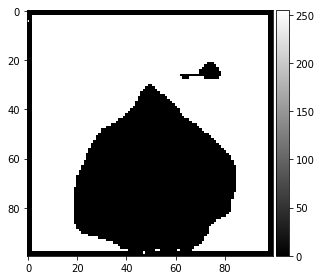

In [8]:
for i in range(0,new.shape[0]):
    for j in range(0,new.shape[1]):
        if new[i][j] == dc.pLABEL[0]:
            new[i][j] = 255
        else:
            new[i][j] = 0
imshow(new,cmap='gray')

In [9]:
new

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255,   0,   0],
       ...,
       [  0,   0, 255, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [10]:
dc.pLABEL

array([0])

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


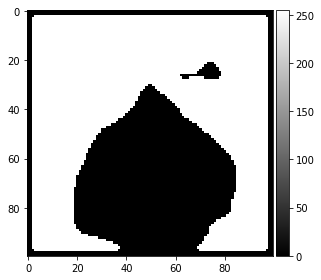

In [11]:
selem = disk(6)
opened = opening(new)
imshow(opened,cmap='gray')

In [12]:
Nsub = dc.ORIG.copy()
Nsub

array([[162, 158, 156, ..., 191, 194, 201],
       [161, 157, 158, ..., 184, 181, 180],
       [160, 156,   0, ...,   0, 178, 173],
       ...,
       [175, 181,   0, ...,   0, 179, 169],
       [199, 199, 196, ..., 181, 174, 172],
       [202, 203, 200, ..., 182, 173, 177]], dtype=uint8)

In [13]:
for i in range (0,opened.shape[0]):
    for j in range (0,opened.shape[1]):
        if opened[i][j] >250:
            Nsub[i][j] = 255

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


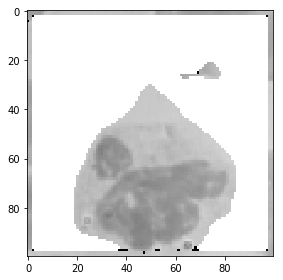

In [14]:
imshow(Nsub)

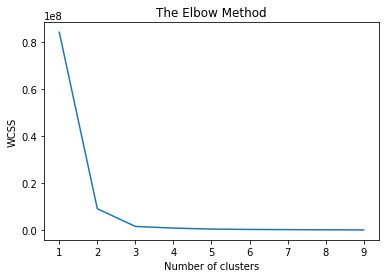

found :3 group


array([[255.        ],
       [116.46907449],
       [ 28.7838765 ]])

In [15]:
dc.setIMG(Nsub) 
dc.elbow()
dc.findK()
dc.IMAGE
dc.dominantColors()

In [16]:
new = np.reshape(dc.LABELS, (-1, dc.ORIG.shape[1]))

In [17]:
new

array([[2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 2, 1, 2],
       ...,
       [1, 1, 2, ..., 2, 1, 2],
       [1, 1, 1, ..., 1, 1, 2],
       [1, 1, 1, ..., 1, 2, 1]])

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


array([[70, 70, 70, ...,  0,  0,  0],
       [70, 70, 70, ...,  0,  0,  0],
       [70, 70, 70, ..., 70,  0, 70],
       ...,
       [ 0,  0, 70, ..., 70,  0, 70],
       [ 0,  0,  0, ...,  0,  0, 70],
       [ 0,  0,  0, ...,  0, 70,  0]])

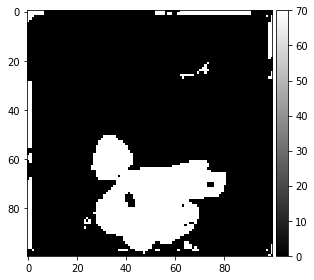

In [18]:
for i in range(0,new.shape[0]):
    for j in range(0,new.shape[1]):
        if new[i][j] == dc.pLABEL[0]:
            new[i][j] = 70
        else:
            new[i][j] = 0
imshow(new,cmap='gray')
new

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


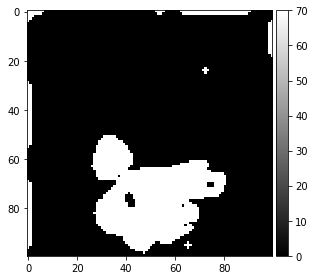

In [19]:
Copened = opening(new)
imshow(Copened,cmap='gray')

In [20]:
new[80][60]

70

In [21]:
last = (opened+Copened)/2

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


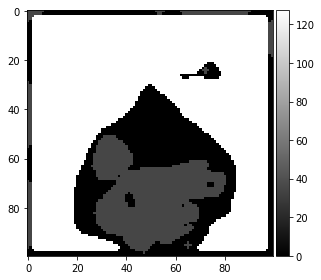

In [22]:
imshow(last,cmap='gray')